# EIA Energy Data

The Form EIA-861 and Form EIA-861S (Short Form) data files include information such as peak load, generation, electric purchases, sales, revenues, customer counts and demand-side management programs, green pricing and net metering programs, and distributed generation capacity.

The EIA-861S was created in 2012 in an effort to reduce respondent burden and to increase EIA's processing efficiency. Approximately 1,100 utilities completed this form in lieu of the EIA-861. The short form has fewer questions and collects retail sales data as an aggregate and not by customer sector. EIA has estimated the customer sector breakdown for this data and has included it in the file called "Retail Sales." Advanced metering data and time-of-use data are collected on both Form EIA-861 and Form EIA-861S.

In 2012, the data files were renamed to help users find the data. Data files prior to 2012 retained their original names, and, in the description below, the prior names are referred to as "Formerly."

Green pricing and demand-side management data were no longer collected after 2012. In 2013, demand-side management data started being collected as energy efficiency and demand response data. Sales to Ultimate Customer, Customer Sited is a new file; this data was previously in Retail Sales as ownership code “unregulated.” Also new in 2013, were the number of distribution circuits (Distribution Systems) and SAIDI* and SAIFI** (Reliability) data.

- Frame – This file, compiled from data collected on both Forms EIA-861 and EIA-861S, contains a complete list of all respondents from both forms and a list of each file they are in.
- Advanced Meters – This file, compiled from data collected on both Forms EIA-861 and EIA-861S, contains information on Automated Meter Readings (AMR) and Advanced Metering Infrastructure (AMI). (Formerly File 8)
- Balancing Authority – This file, contains the list of Balancing Authorities and the states they operate in, for the EIA-861 and EIA-861S. (Formerly File 1_cao)
- Demand Response (2013 forward) – This file, compiled from data collected on Form EIA-861 only, contains the number of customers enrolled, energy savings, potential and actual peak savings, and associated costs.
- Distribution Systems (2013 forward) – This file, compiled from data collected on Form EIA-861 only, contains the number of distribution circuits and circuits with voltage optimization.
- Dynamic Pricing (2013 forward) – This file, compiled from data collected on Form EIA-861 only, contains the number of customers enrolled in various programs, i.e. time of use, real time, variable peak and critical peak pricing, and critical peak rebate programs.
- Energy Efficiency (2013 forward) – This file, compiled from data collected on Form EIA-861 only, contains incremental and life cycle data on energy savings, peak demand savings, weighted average life, and associated costs.
- Mergers (2007 forward) – This file, compiled from data collected on Form EIA-861 only, contains information on mergers and acquisitions. (Formerly File 7)
- Net Metering (2007 forward) – This file, compiled from data collected on Form EIA-861 only, contains number of customers and displaced energy, by sector and state. For 2010 forward, it contains capacity, customer count, and energy sold back (an optional question on the survey) by sector and state and by technology type, i.e. photovoltaic, wind, and/or other.
- Non Net Metering Distributed – This file, compiled from data collected on Form EIA-861 only, contains information on utility or customer-owned distributed generators such as the number, capacity, and technology type of generators. Capacities by photovoltaic and storage generation types were added in 2010, fuel cells were added in 2016. Starting in 2016, this data is now collected at the sector level. (Formerly Distributed Generation, Formerly File 6)
- Operational Data – This file, compiled from data collected on Form EIA-861 only, contains aggregate operational data for the source and disposition of energy and revenue information from each electric utility in the country, including power marketers and federal power marketing administrations. (Formerly File 1)
- Reliability (2013 forward) – This file, compiled from data collected on Form EIA-861 only, contains SAIDI and SAIFI data.
- Sales to Ultimate Customers – This file, compiled from data collected on the Form EIA-861 and an estimate from Form EIA-861S for data by customer sector, contains information on retail revenue, sales, and customer counts by state, balancing authority, and class of service (including the transportation sector which was added in 2003) for each electric distribution utility or energy service provider. (Formerly File 2)
- Sales to Ultimate Customers, Customer Sited – This file, compiled from data collected on the Form EIA-923 only, contains information on retail revenue, sales, and customer counts by state and balancing authority. This includes retail sales from any units located at a customer site.
- Service Territory – This file, compiled from data collected on the Form EIA-861 and Form 861S, contains the names of the counties, by state, in which the utility has equipment for the distribution of electricity to ultimate consumers. (Formerly File 4)
- Short Form (2012 forward) – This file, compiled from data collected on the Form EIA-861S in aggregate, contains information on retail revenue, sales, and customer counts by utility, by state.
- Utility Data (2007 forward) – This file, compiled from data collected on Form EIA-861 only, contains information on the types of activities each utility engages in, the NERC regions of operation, whether the utility generates power, whether it operates alternative-fueled vehicles, and, beginning in 2010, the ISO or RTO region in which the entity conducts operations. (Formerly File 1_a)
- Demand-Side Management (discontinued after 2012) – This file, compiled from data collected on both Form EIA-861 and, for time-based rate programs, Form EIA-861S, contains information on electric utility demand-side management programs, including energy efficiency and load management effects and expenditures. Beginning in 2007, it also contains the number of customers in time-based rate programs. (Formerly File 3)
- Green Pricing (discontinued after 2012) – This file, compiled from data collected on Form EIA-861 only, contains number of customers, sales, and revenue, by sector and state. (Formerly File 5)

**Note: All sales data, including energy efficiency savings, are in megawatthours. Peak and peak reduction data are in megawatts for 2001 forward and kilowatts for previous years. Revenue and expenditure data are in nominal thousand-dollar units.**

*System Average Interruption Duration Index  
**System Average Interruption Frequency Index

# Read Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
print(plt.style.available)
plt.style.use('fivethirtyeight')
%matplotlib inline

['seaborn-colorblind', 'seaborn-notebook', 'Solarize_Light2', 'dark_background', 'seaborn-bright', 'seaborn-muted', 'classic', 'fast', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-paper', 'seaborn', 'tableau-colorblind10', 'bmh', 'seaborn-poster', 'seaborn-dark', 'seaborn-deep', 'seaborn-darkgrid', '_classic_test', 'seaborn-talk', 'ggplot', 'seaborn-white', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-ticks', 'grayscale']


# Short Form Responses (Revenue and Number of Customers)

In [60]:
sf = pd.read_excel('../data/eia861/2016/Short_Form_2016.xlsx')
sf = sf.replace('.', np.nan)

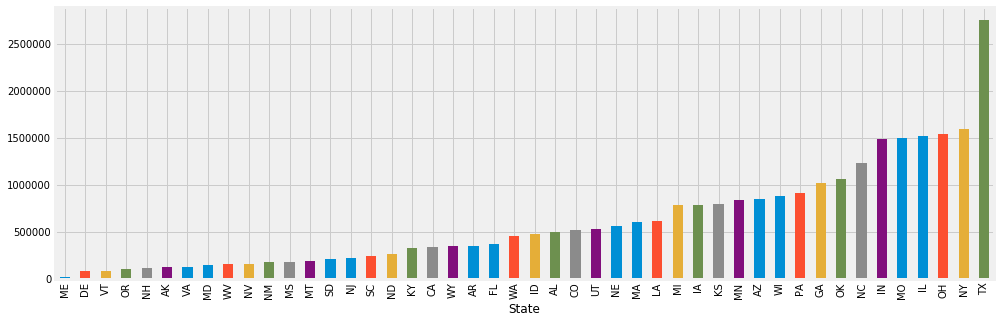

In [61]:
sf.groupby('State').sum()['Total Sales (MWh)'].sort_values().plot(kind='bar', figsize=(15, 5))

In [62]:
sf['Rev_per_customer'] = sf['Total Revenue (Thousand Dollars)'] / sf['Total Customers']

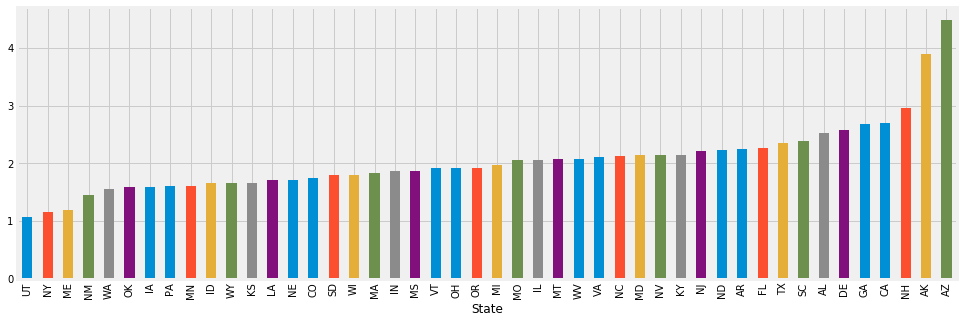

In [66]:
sf.groupby('State').median()['Rev_per_customer'].sort_values().plot(kind='bar', figsize=(15, 5))

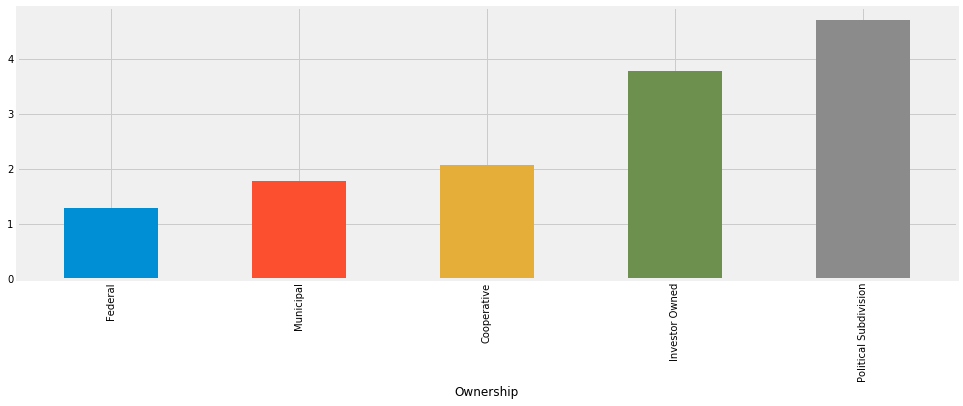

In [68]:
sf.groupby('Ownership').median()['Rev_per_customer'].sort_values().plot(kind='bar', figsize=(15, 5))

In [73]:
sf.dtypes

Data Year                            object
Utility Number                      float64
Utility Name                         object
Ownership                            object
State                                object
BA_CODE                              object
Total Revenue (Thousand Dollars)    float64
Total Sales (MWh)                   float64
Total Customers                     float64
Water Heater                        float64
Net Metering                         object
Demand Side Management               object
Time Based Programs                  object
Rev_per_customer                    float64
dtype: object

In [132]:
sf_no_small = sf.loc[sf['Total Customers'] > 1000][['Total Revenue (Thousand Dollars)',
                 'Total Sales (MWh)',
                 'Total Customers',
                 'Rev_per_customer', 'Ownership']].dropna()

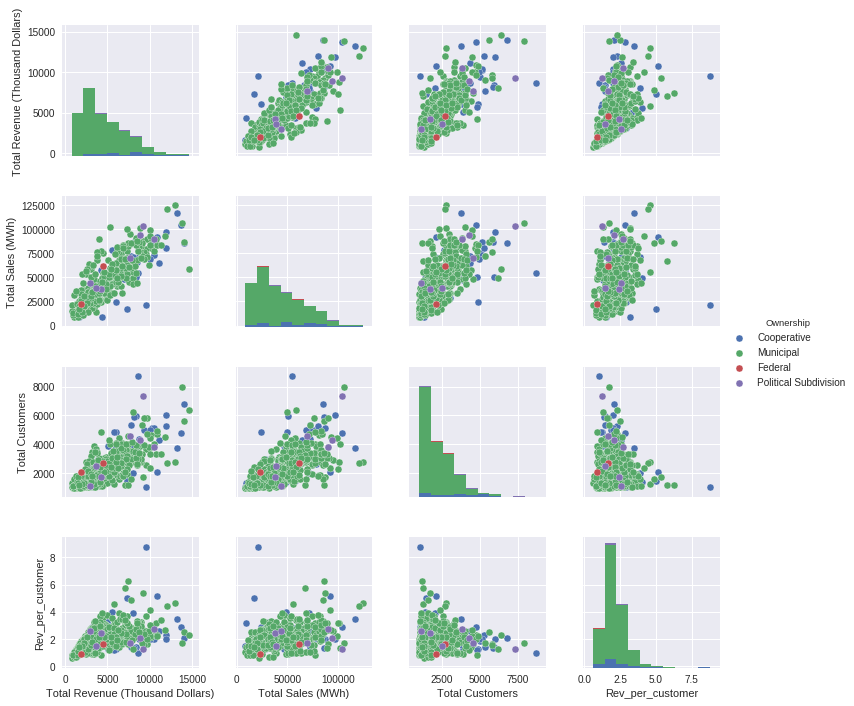

In [133]:
plt.style.use('seaborn')
sns.pairplot(sf_no_small[['Total Revenue (Thousand Dollars)',
                 'Total Sales (MWh)',
                 'Total Customers',
                 'Rev_per_customer', 'Ownership']].dropna(),
            hue='Ownership')

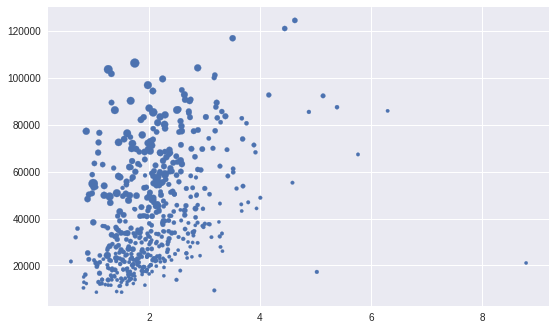

In [161]:
plt.scatter(x=sf_no_small['Rev_per_customer'],
            y=sf_no_small['Total Sales (MWh)'],
            s=sf_no_small['Total Customers'] / 100)

In [162]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [167]:
p = figure()
p.circle(x=sf_no_small['Rev_per_customer'],
            y=sf_no_small['Total Sales (MWh)'],
        radius=sf_no_small['Total Customers'] / 100000)
show(p)

## Energy Efficiency (2016)

In [104]:
ee = pd.read_excel('../data/eia861/2016/Energy_Efficiency_2016.xlsx', header=[0, 1, 2])

In [106]:
ee = ee.replace('.', np.nan)

In [111]:
ee.dtypes

Utility Characteristics                                                            Data Year     
Utility Characteristics                    Unnamed: 0_level_1                      Utility Number    float64
                                           Unnamed: 1_level_1                      Utility Name       object
                                           Unnamed: 2_level_1                      State              object
Reporting Year Incremental Annual Savings  Energy Savings (MWh)                    Residential       float64
                                                                                   Commercial        float64
                                                                                   Industrial        float64
                                                                                   Transportation    float64
                                                                                   Total             float64
                              

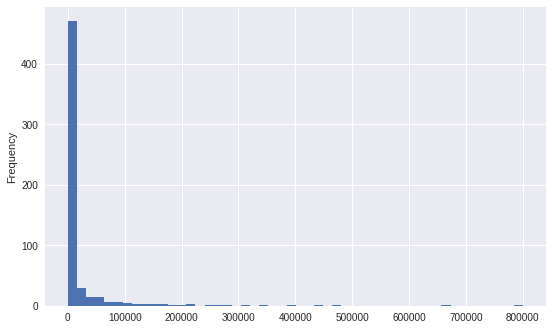

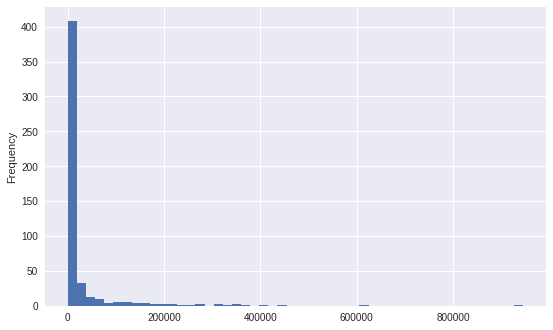

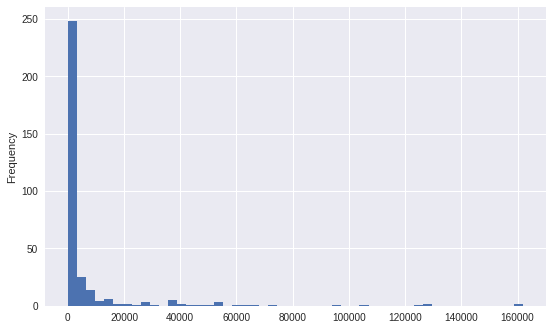

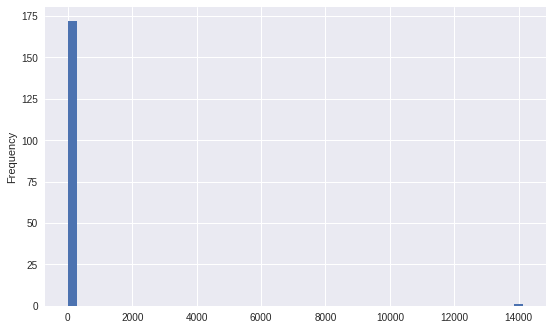

In [123]:
ee['Reporting Year Incremental Annual Savings']['Energy Savings (MWh)']['Residential'].plot(kind='hist', bins=50)
plt.show()
ee['Reporting Year Incremental Annual Savings']['Energy Savings (MWh)']['Commercial'].plot(kind='hist', bins=50)
plt.show()
ee['Reporting Year Incremental Annual Savings']['Energy Savings (MWh)']['Industrial'].plot(kind='hist', bins=50)
plt.show()
ee['Reporting Year Incremental Annual Savings']['Energy Savings (MWh)']['Transportation'].plot(kind='hist', bins=50)